## Playing with Python Libraries

In this notebook, we will play with some Python libraries to perform some common tasks. W1 will:

1. Use `requests` and `BeautifulSoup` to scrape a web page.
2. Analyse the text using the `spaCy` natural language processing library.
3. View the results in tables using `pandas`.

In [163]:
# Import requests and BeautifulSoup
import requests
from bs4 import BeautifulSoup

# The web page to scrape
url = 'https://www.fanfiction.net/s/6041872/1/Broken'

# The requests library sends an HTTP request and returns a response
response = requests.get(url)

# BeautifulSoup converts the web page to a list of elements
soup = BeautifulSoup(response.text, 'html.parser')

# We're going to guess where the content we want is in the page.
# You may have to change this, depending on how the page is organised.
content = soup.find('#storytext')

In [164]:
# Now that we have the content, let's get all the paragraph tags
# and join them into a single string.
content = soup.find_all('p')
paras = [p.text for p in content[2:]]
text = ' '.join(paras)

print(text[0:500] + '...')

Broken Elrond's earliest memories were of screams and smoke. The screams rose up from the battle, ringing loud and harsh in his young ears. The smoke billowed thick and heavy as Sirion burned, and when combined with Elros's rigid hold, the ash in the air made breathing difficult. His brother clutched him so tightly his ribs ached, but Elrond's own arms were wrapped just as tightly around Elros. They huddled together atop the cliffs overlooking the Sea, and they trembled in the darkness as their ...


In [166]:
# Import the spaCy Natural Language Processing (NLP) library
import spacy

# Load spaCy's language model
nlp = spacy.load('en_core_web_sm')

# Process our text into a spaCy document
doc = nlp(text)

# Get some linguistic features
for token in doc[0:5]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Broken Broken PROPN NNP compound Xxxxx True False
Elrond Elrond PROPN NNP poss Xxxxx True False
's 's PART POS case 'x False True
earliest early ADJ JJS amod xxxx True False
memories memory NOUN NNS nsubj xxxx True False


That looks like it has some useful information, but it is hard to read!

Time to play with pandas dataframes. A dataframe is a structure for holding data that can be easily viewed in a table. It's basically Excel for Python.

We are going to assume that each token in a spaCy doc is a set of features (lemma, part of speech, etc.), and we want each token in its own row and each feature in its own column. To do this, we'll create a list of features with the features for each token in a dict. The dict keys will be the column names. Once we massage our data into that format, we can create the dataframe.

In [173]:
# Import pandas
import pandas as pd

# Load the document features into a dict
features = []
for token in doc:
    feature = {
        'token': token.text,
        'norm': token.norm_,
        'lemma': token.lemma_,
        'pos': token.pos_,
        'stopword': token.is_stop
    }
    features.append(feature)

# Create a pandas dataframe
df = pd.DataFrame(features, columns=['token', 'norm', 'lemma', 'pos', 'stopword'])
df.head(10)

,token,norm,lemma,pos,stopword
0,Broken,broken,Broken,PROPN,False
1,Elrond,elrond,Elrond,PROPN,False
2,'s,'s,'s,PART,True
3,earliest,earliest,early,ADJ,False
4,memories,memories,memory,NOUN,False
5,were,were,be,AUX,True
6,of,of,of,ADP,True
7,screams,screams,scream,NOUN,False
8,and,and,and,CCONJ,True
9,smoke,smoke,smoke,NOUN,False


In [177]:
# We can sort dataframes!

sorted = df.sort_values('norm')
# To reverse sort
# sorted = df.sort_values('norm', ascending=False)

# Show the sorted table
sorted.head(10)

,token,norm,lemma,pos,stopword
893,!,!,!,PUNCT,False
1913,"""","""","""",PUNCT,False
8463,"""","""","""",PUNCT,False
8470,"""","""","""",PUNCT,False
8483,"""","""","""",PUNCT,False
1910,"""","""","""",PUNCT,False
3654,"""","""","""",PUNCT,False
5520,"""","""","""",PUNCT,False
8547,"""","""","""",PUNCT,False
5574,"""","""","""",PUNCT,False


In [178]:
# We don't want punctuation, spaces, digits, and stop words in our table. Take them out!
tokens = [token.norm_ for token in doc if token.pos_ not in ['PUNCT', 'SPACE'] and token.norm_.isdigit() == False and token.is_stop == False]

# Create a pandas dataframe, this time with just the lower-cased tokens
df = pd.DataFrame(tokens, columns=['norm'])
df.head(10)

,norm
0,broken
1,elrond
2,earliest
3,memories
4,screams
5,smoke
6,screams
7,rose
8,battle
9,ringing


In [179]:
# Get a dict of the norms and counts
counts = df['norm'].value_counts().to_dict()

# Convert it to a list of dicts and feed to a new dataframe
counts = [{'norm': k, 'count': v} for k, v in counts.items()]
counted = pd.DataFrame(counts, columns=['norm', 'count'])

# Show the counts
counted.head(10)

,norm,count
0,elrond,149
1,ereinion,35
2,elros,33
3,celebrían,23
4,eyes,21
5,vilya,18
6,found,17
7,imladris,17
8,came,16
9,elves,15


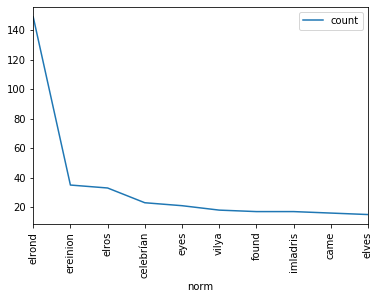

In [182]:
# We can even do some fancy plotting using Python's matplotlib library
import matplotlib.pyplot as plt

# Some archane matplotlib stuff that experts understand and the rest of us Google
ax = plt.gca()
counted[0:10].plot(kind='line', x='norm', y='count', ax=ax, rot=90)
plt.show()

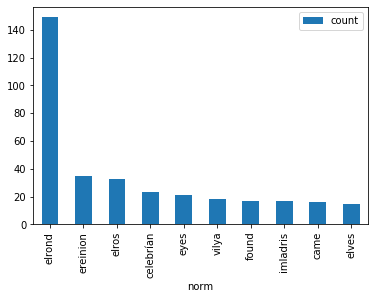

In [107]:
# Or we cna show it in a bar chart
counted[0:10].plot(kind='bar', x='norm', y='count')
plt.show()

## `textacy`

The Python `textacy` library builds on top of spaCy. Below we are going to create a corpus of texts by Tolkien fans using `textacy`. Then we'll use its built-in methods to do some analysis.

In [184]:
# Import textacy
import textacy

In [185]:
# Get keywords in context (KWIC)
textacy.text_utils.KWIC(text, 'war', window_width=35)

ling to fathom the sudden sense of  war ning, and Elros clutched him harder
t look at her sons and stepped back war d over the cliff's edge. The night 
ater years, it would be called the  War  of Wrath, but to Elrond, it was no
Wrath, but to Elrond, it was not a  war . War he knew and war he had fought
, but to Elrond, it was not a war.  War  he knew and war he had fought, but
 it was not a war. War he knew and  war  he had fought, but this… This was 
they walked in disbelief. The long  war  was over. Morgoth was gone! Elrond
too young to remember the previous  war s, they felt keenly the love their 
y were not alone. Eönwë stepped for war d. None noted his arrival, but all 
 in a livid Oropher who stepped for war d and leveled his spear tip at the 
ey chose different fates after the  War  of Wrath and even though they were
ed Elros's passing, the music that  war ded his dreams was all that sustain
imself as Sauron and declared open  war  upon Eregion, Elrond used the long
ed it. Elron

In [186]:
# Let's use textacy instead of list comprehensions to scrub
from textacy import preprocessing
normalized_text = preprocessing.normalize_whitespace(preprocessing.remove_punctuation(text))
normalized_text = textacy.preprocessing.replace.replace_numbers(normalized_text, '')
normalized_text[0:100]

'Broken Elrond s earliest memories were of screams and smoke The screams rose up from the battle ring'

### Document statistics

`textacy` can make spaCy docs. Once we have that done, we can use its `keywords` module to extract key phrases according to several different algoritms (the example shown below uses the "TextRank" algorithm).

We can also get other kinds of statistics and even use `textacy` to produce term counts as we did above. 

In [194]:
# Specify the language model and make a spaCy doc
en = textacy.load_spacy_lang('en_core_web_sm')
doc = textacy.make_spacy_doc(text, lang=en)

# Import the keywords module
import textacy.ke
print('Textrank:')
print(textacy.ke.textrank(doc, normalize='lemma', topn=10))

Textrank:
[('0- Elrond', 0.009233980284544877), ('confusion Elrond', 0.008880351026987409), ('Elrond vice', 0.008877603881184378), ('Elrond conscious', 0.008804192653349202), ('Broken Elrond', 0.00872766385027007), ('request Ereinion', 0.0031421855899045185), ('burden Celebrían', 0.002976165084237309), ('0- Celebrían', 0.0027413767352524343), ('Celeborn time', 0.0026465825909142856), ('weary day', 0.002536598740043048)]


In [195]:
# Let's get some text statistics

stats = textacy.TextStats(doc)
stats.basic_counts

{'n_sents': 513,
 'n_words': 7822,
 'n_chars': 34362,
 'n_syllables': 10223,
 'n_unique_words': 1792,
 'n_long_words': 1327,
 'n_monosyllable_words': 5886,
 'n_polysyllable_words': 402}

In [196]:
# What is the reading level for this text?

stats.readability_stats

{'flesch_kincaid_grade_level': 5.778615675385517,
 'flesch_reading_ease': 80.79035193633393,
 'smog_index': 8.1861736632056,
 'gunning_fog_index': 8.154765561023215,
 'coleman_liau_index': 8.088887309383793,
 'automated_readability_index': 6.884783977614994,
 'lix': 32.21253394858207,
 'gulpease_index': 64.74533367425211,
 'wiener_sachtextformel': 2.408561603075845}

In [201]:
# Get a bag of words using frequencies instead of counts
bow = doc._.to_bag_of_terms(ngrams=(1), entities=False, weighting="freq", as_strings=True)

# Let's look at this in a dataframe
bow = [{'Term': k, 'Frequency': v} for k, v in bow.items()]
bow_df = pd.DataFrame(bow, columns=['Term', 'Frequency'])
bow_df = bow_df.sort_values('Frequency', ascending=False)
snippet = bow_df.head(15)

# This just hides the dataframe index in a jupyter notebook, which is more pleasant on the eye
from IPython.display import display, HTML
display(HTML(snippet.to_html(index=False)))

Term,Frequency
0,0.002700
come,0.002588
eye,0.002475
find,0.002363
Ereinion,0.002250
know,0.002250
time,0.002138
elf,0.002025
hope,0.001913
moment,0.001913


So far, we've only played with one text. In the next notebook, we'll use `textacy` to build a corpus of texts and perform some low-level analysis.